### This notebook is for building the first model which is Decision Tree

#### The cleaned dataset which is a result of the Data Cleaning and Expolration.ipynb will be import for model building

### Note : The class of the target is imbalance

In [24]:
#Import Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pickle

In [3]:
df = pd.read_csv("winequality-red-clean.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Spliting Data

In [7]:
target = "quality"
X = df.drop(columns=target)
y = df[target]

print(f"The Shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

The Shape of X is (1744, 11)
The shape of y is (1744,)


In [8]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of X_test is {X_test.shape}")
print(f"The shape of y_train is {y_train.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of X_train is (1395, 11)
The shape of X_test is (349, 11)
The shape of y_train is (1395,)
The shape of y_test is (349,)


#### Due to the imbalance discovered in the data , the test must be resampled

In [12]:
#Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(410, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9
1,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3
2,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2
3,7.2,0.340,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1
4,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4


In [14]:
#Checking if the class is balanced for under sampled dataset
y_train_under.value_counts(normalize=True)

1    0.5
0    0.5
Name: quality, dtype: float64

In [16]:
#Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(2380, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.1,0.48,0.28,2.8,0.068,6.0,16.0,0.99682,3.24,0.53,10.3
1,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.6
2,7.6,0.51,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2
3,6.4,0.40,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.2
4,9.1,0.25,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2


In [17]:
#Checking if the class is balanced for over sampled dataset
y_train_over.value_counts(normalize=True)

1    0.5
0    0.5
Name: quality, dtype: float64

## Model Building
### Three model will be built
### model_reg is for regular data that is not over or under sampled
### Model_under for under sampled data
### Model_over for over sampled date
### The best model will be selected

In [19]:
model_reg = DecisionTreeClassifier(random_state=42)
model_reg.fit(X_train, y_train)

model_under = DecisionTreeClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)

model_over = DecisionTreeClassifier(random_state=42)
model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=42)

In [20]:
#Checking for the best model
for i in [model_reg, model_under, model_over]:
    acc_train = i.score(X_train, y_train)
    acc_test = i.score(X_test, y_test)
    print(f"The Training Accuracy is {round(acc_train, 4)}")
    print(f"The Test Accuracy is {round(acc_test, 4)}")

The Training Accuracy is 1.0
The Test Accuracy is 0.8682
The Training Accuracy is 0.8387
The Test Accuracy is 0.7536
The Training Accuracy is 1.0
The Test Accuracy is 0.8854


#### It can be seen that model_over is the best model because it has the highest test accuracy

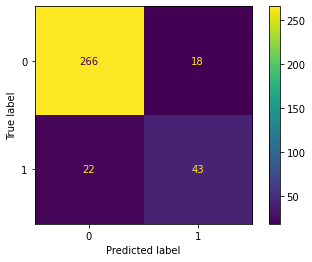

In [22]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

### Extracting the 5 most important features in this model

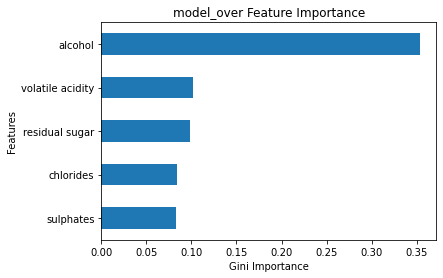

In [23]:
importance = model_over.feature_importances_

feat_imp = pd.Series(importance, index=X_train_over.columns).sort_values()

feat_imp.tail().plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("model_over Feature Importance");

### The most important features are;
    1. Alcohol
    2. Volatile Acidity
    3. Residual Sugar
    4. Chlorides
    5. Sulphates

### Save the best model

In [25]:
with open("decision-tree.pkl", "wb") as g:
    pickle.dump(model_over, g)